Сначала посмотрим на фрейм с данными:

In [48]:
import pandas as pd
from ast import literal_eval

frame = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

frame.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN


Столбец "event_json" является фреймом во фрейме: это делает исходную таблицу лаконичнее, но лично мне удобнее преобразовать все в один фрейм, где данные о eCPM, типе рекламе и пр будут новыми стобцами исходной таблицы. Выполню это посредством следующих действий:

In [49]:
res = pd.DataFrame(frame['event_json'].map(literal_eval).to_list())
res_table = frame.join(res)
res_table.pop('event_json')
res_table.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,...,0.061065,1.543673,1.543673,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CKjDtPSh6_UCFV-DywEd7-gBAQ
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,...,0.063451,1.627922,1.627922,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,...,0.063945,1.514549,1.514549,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CPTz84Ki6_UCFUp2wQodL68LZw
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,...,0.066332,1.601711,1.601711,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-57
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,...,0.066826,1.490959,1.490959,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,COaY9ZCi6_UCFRN3wQodXY4GCg


Теперь можно приступать к выполнению заданий

## 1a. построить распределение средних eCPM-ов юзеров

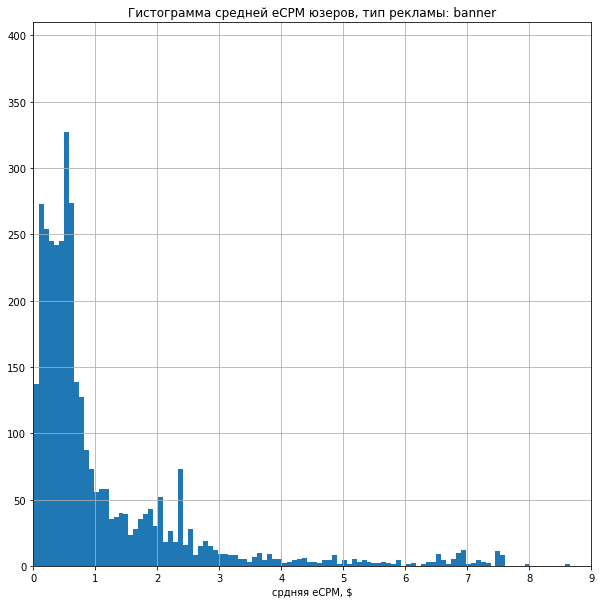

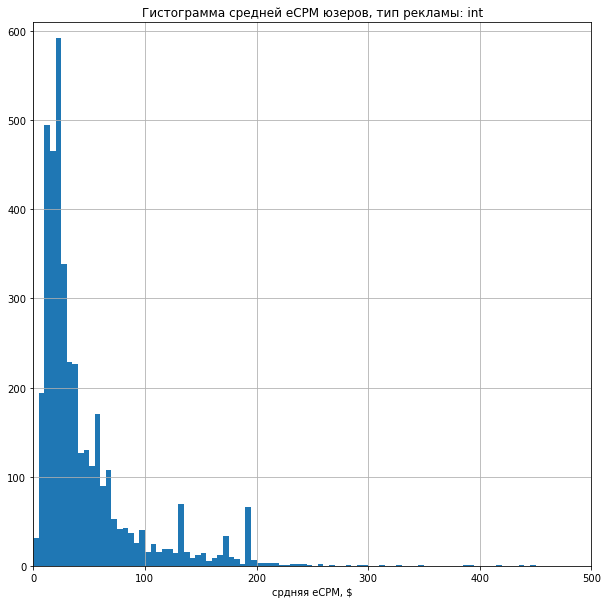

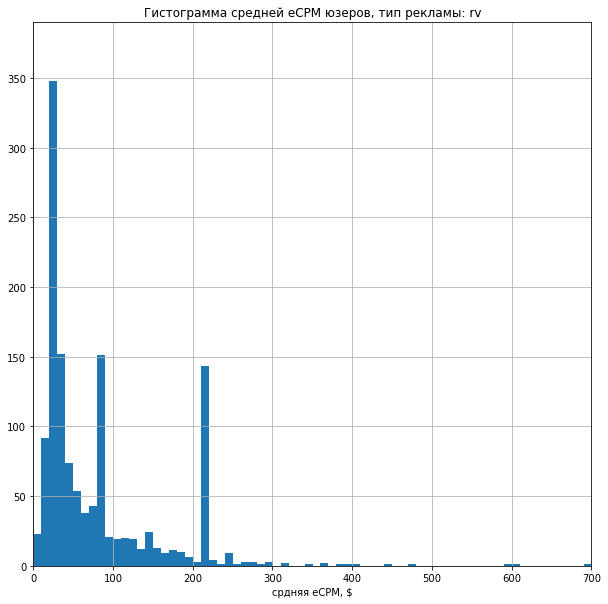

In [50]:
import numpy as np
import matplotlib.pyplot as plt

ad_cols = ['banner', 'int', 'rv']                          #    список типов реклам для перебора в цикле                     
hist_step = [0.08, 5, 10]                                  #    список шагов для построения гистгораммы: выбрал перебором
scale = [[0, 9, 0, 410], [0, 500, 0, 610], [0, 700, 0, 390]]  #список масштабов для гистограммы

for ad, step, scaling in zip(ad_cols, hist_step, scale):
    mean_eCPM_us = res_table[['profile_id', 'ad_type', 'revenue']]

    mean_eCPM_us = mean_eCPM_us[mean_eCPM_us['ad_type'] == ad]
    mean_eCPM_us.pop('ad_type')

    mean_eCPM_us = 1000*mean_eCPM_us.groupby(['profile_id']).mean()  #усредняю все eCPM по юзеру, учел умножение revenue на 1000
    mean_us = mean_eCPM_us['revenue']
    bins_value = np.arange(min(mean_us), max(mean_us), step)  #массив бинов для гистограммы
     
    title = 'Гистограмма средней eCPM юзеров'
    
    plt.figure(figsize = (10, 10))
    plt.hist(mean_us, bins = bins_value)
    plt.title(title +', тип рекламы: ' + ad)
    plt.xlabel('срдняя eCPM, $')
    plt.axis(scaling)
    plt.grid(True)

## 1b. отобразить средние eCPM-ы по городам, версиям ОС

Сначала отображу средние eCPM для версий. Для наглядности версии отсортировал в порядке возрастания

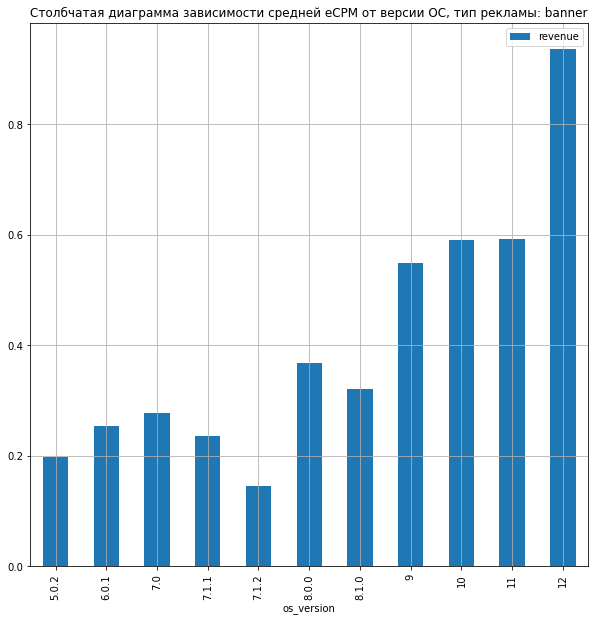

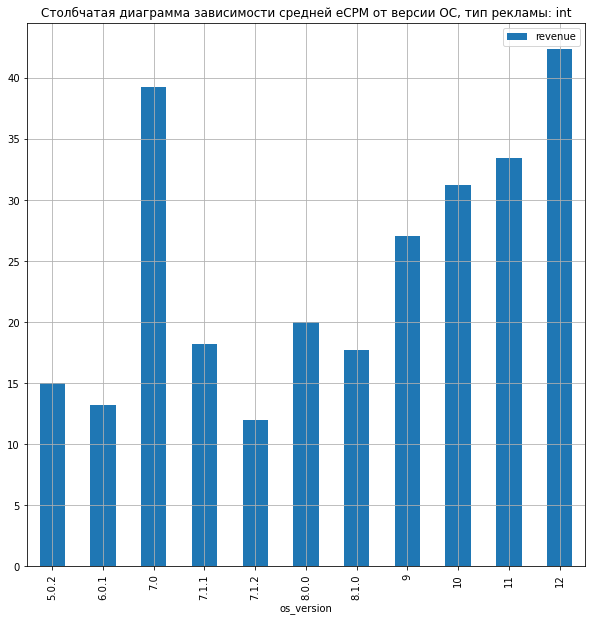

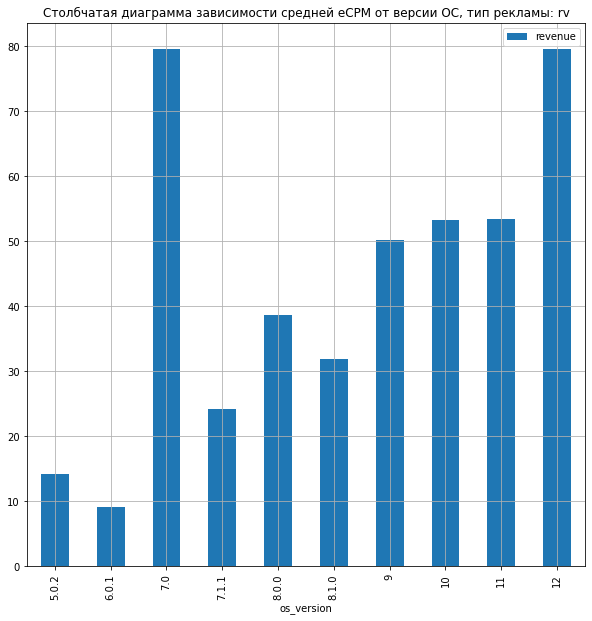

In [51]:
ad_cols = ['banner', 'int', 'rv']
index_s = [9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8]
index_s = pd.Series(index_s, name = 'index_s')

for ad in ad_cols:
    mean_eCPM = res_table[['os_version', 'ad_type', 'revenue']]

    mean_eCPM = mean_eCPM[mean_eCPM['ad_type'] == ad]
    mean_eCPM.pop('ad_type')

    mean_eCPM = 1000*(mean_eCPM.groupby(['os_version']).mean())
    mean_eCPM = mean_eCPM.reset_index()
    mean_eCPM = mean_eCPM.join(index_s)
    
    
    mean_eCPM = mean_eCPM.sort_values(by= 'index_s', ascending=True)
    
    mean_eCPM = mean_eCPM.set_index('os_version')
    

    title = 'Столбчатая диаграмма зависимости средней eCPM от версии ОС'
    ax = mean_eCPM.plot.bar(y='revenue', figsize=(10, 10), title = title +', тип рекламы: ' + ad)

    ax.grid(True)

Теперь отображу средние eCPM по городам. На столбчатой диаграмме отображу несколько городов - все в целом будут хранить в отдельном датафрейме. Данные располагаются в порядке убывания среднего eCPM в долларах США

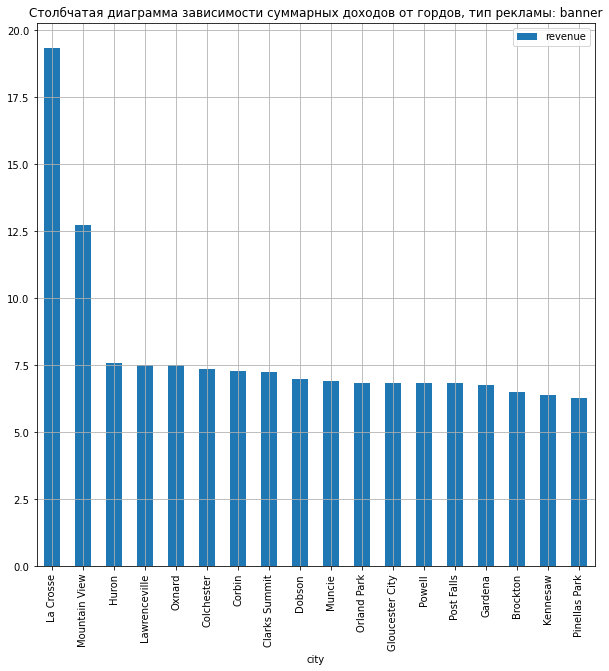

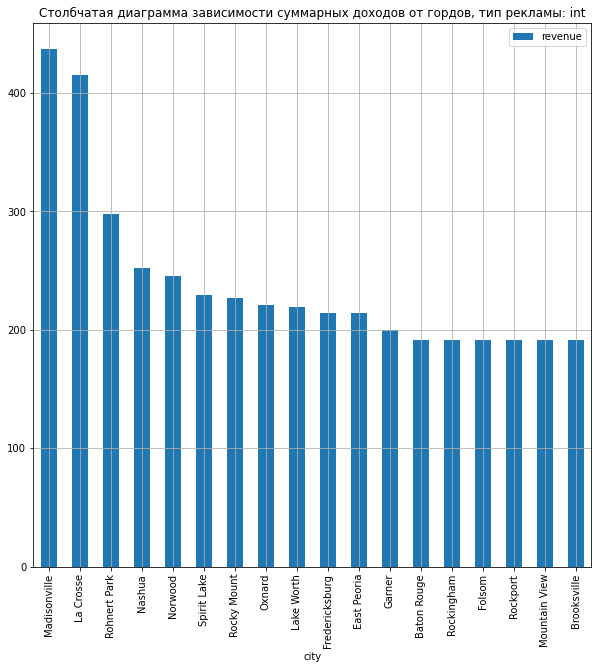

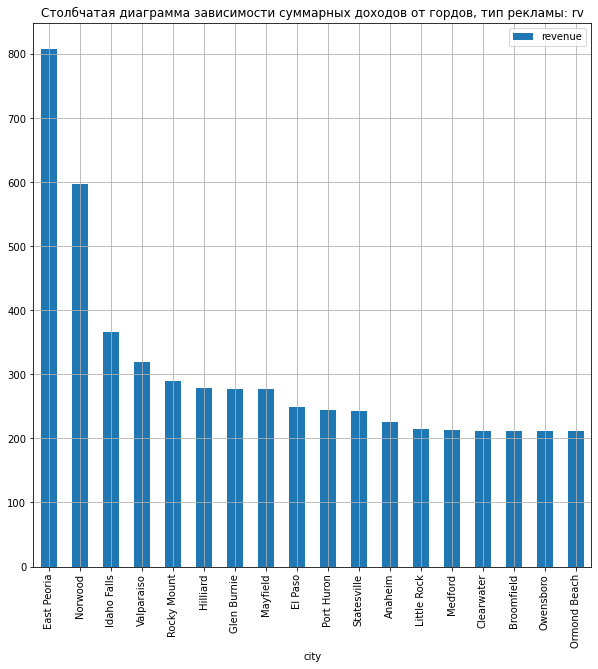

In [52]:
ad_cols = ['banner', 'int', 'rv']


for ad in ad_cols:
    mean_eCPM = res_table[['city', 'ad_type', 'revenue']]

    mean_eCPM = mean_eCPM[mean_eCPM['ad_type'] == ad]
    mean_eCPM.pop('ad_type')
#mean_eCPM_banner.head()
    #mean_eCPM = mean_eCPM_int.sort_values(['os_version'])
    mean_eCPM = 1000 * (mean_eCPM.groupby(['city']).mean())
    
    mean_eCPM = mean_eCPM.sort_values(by= 'revenue', ascending=False)
    
    
    mean_eCPM.to_csv('city ' + ad + '.csv')
    
    plotting = mean_eCPM.head(18)

    title = 'Столбчатая диаграмма зависимости суммарных доходов от гордов'
    ax = plotting.plot.bar(y='revenue', figsize=(10, 10), title = title + ', тип рекламы: ' + ad)

    ax.grid(True)

Подробные таблицы с данными средних eCPM по городам сохранены в csv файлы в директории расположения ноутбука. Носят названия citr banner.csv, city int.csv, city rv.csv. Ниже приведен пример, показывающий успешную загрузку сохраненного файла

In [53]:
frames = pd.read_csv('city banner.csv')

In [54]:
frames.head()

,city,revenue
0,La Crosse,19.326435
1,Mountain View,12.750000
2,Huron,7.574941
3,Lawrenceville,7.519341
4,Oxnard,7.519341


## 1c. отобразить суммарные доходы по городам, версиям ОС

Сначала отображу по ОС, в порядке возрастания версии

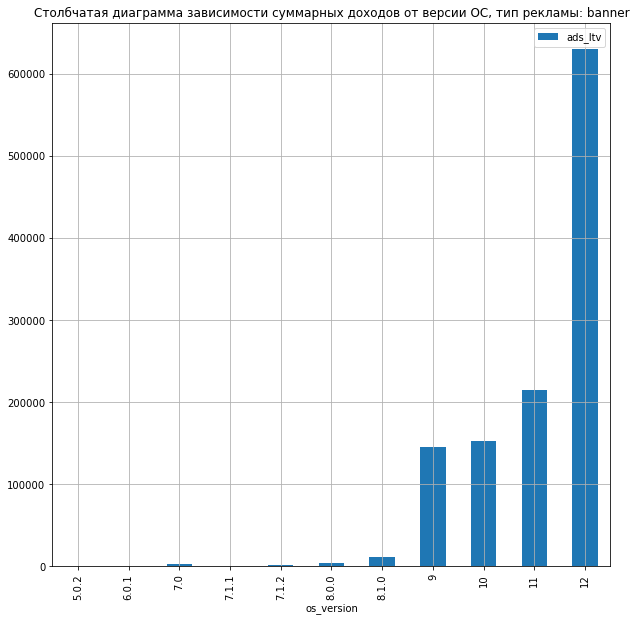

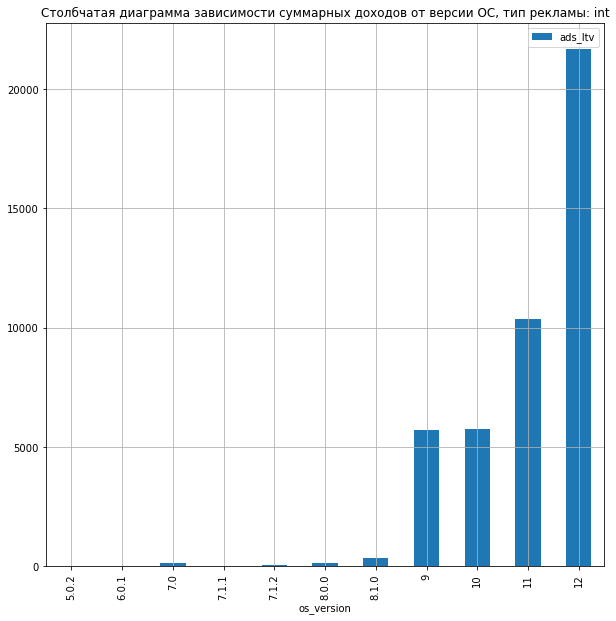

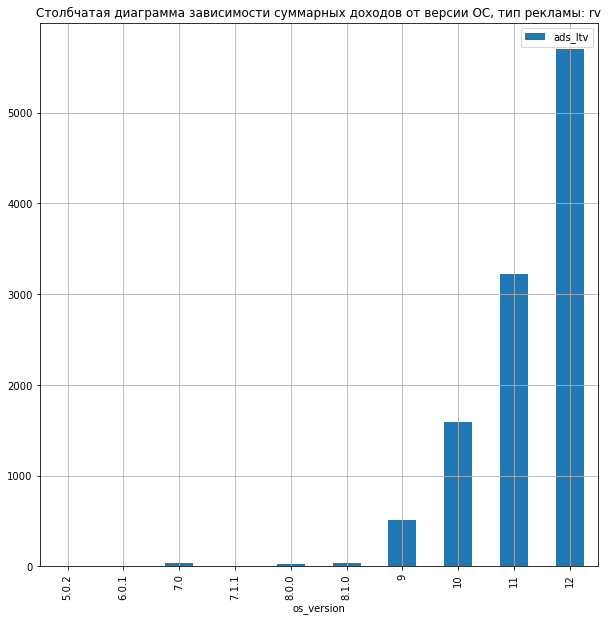

In [55]:
ad_cols = ['banner', 'int', 'rv']

index_s = [9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8]
index_s = pd.Series(index_s, name = 'index_s')

for ad in ad_cols:
    ad_ltv = res_table[['os_version', 'ad_type', 'ads_ltv']]

    ad_ltv = ad_ltv[ad_ltv['ad_type'] == ad]
    ad_ltv.pop('ad_type')

    ad_ltv = ad_ltv.groupby(['os_version']).sum()
    
    ad_ltv = ad_ltv.reset_index()
    ad_ltv = ad_ltv.join(index_s)
    
    
    ad_ltv = ad_ltv.sort_values(by = 'index_s', ascending=True)
    
    ad_ltv = ad_ltv.set_index('os_version')

    title = 'Столбчатая диаграмма зависимости суммарных доходов от версии ОС'
    ax = ad_ltv.plot.bar(y='ads_ltv', figsize=(10, 10), title = title + ', тип рекламы: '+ ad)

    ax.grid(True)

Теперь суммарный доход по городам, аналогично пункту 1b

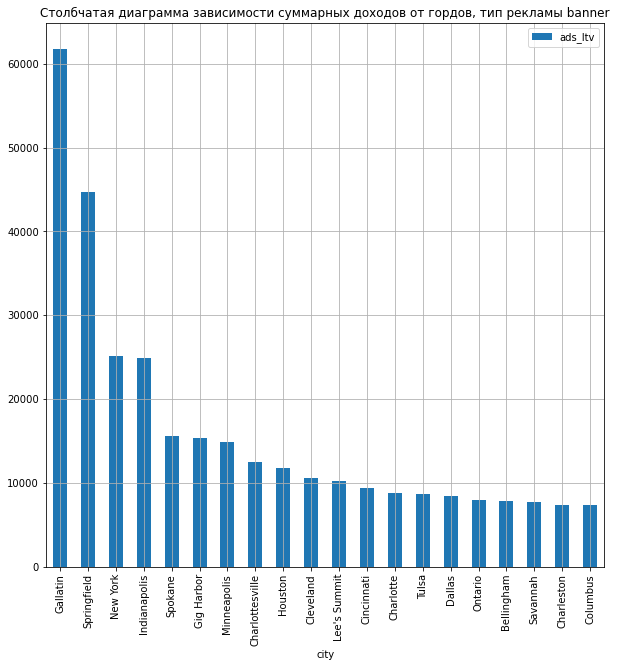

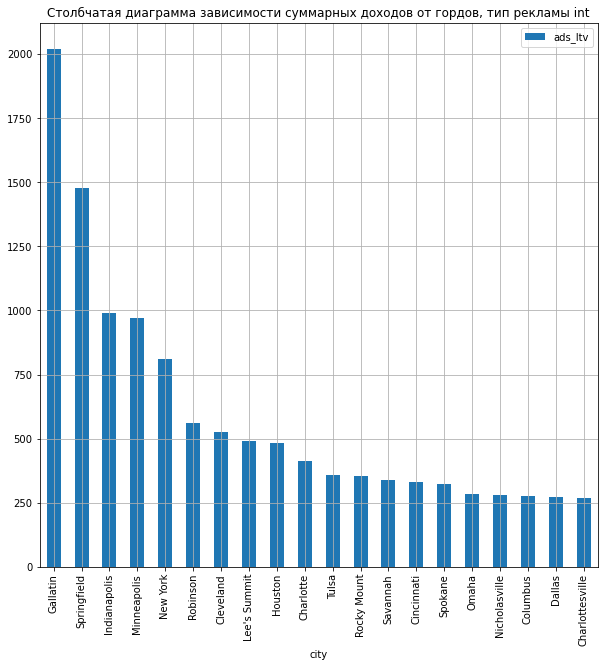

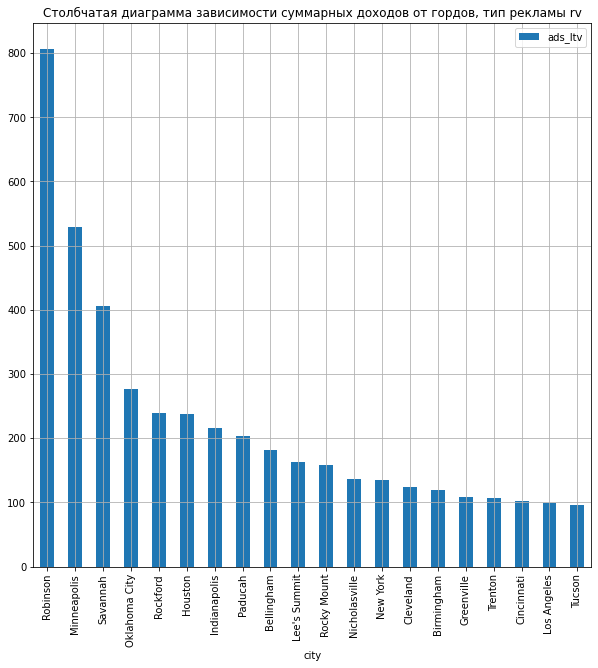

In [56]:
ad_cols = ['banner', 'int', 'rv']

for ad in ad_cols:
    ad_ltv = res_table[['city', 'ad_type', 'ads_ltv']]

    ad_ltv = ad_ltv[ad_ltv['ad_type'] == ad]
    ad_ltv.pop('ad_type')
#mean_eCPM_banner.head()
    #mean_eCPM = mean_eCPM_int.sort_values(['os_version'])
    ad_ltv = ad_ltv.groupby(['city']).sum()
    
    ad_ltv = ad_ltv.sort_values(by= 'ads_ltv', ascending=False)
    
    ad_ltv.to_csv('summary city ' + ad + '.csv')
    
    plotting = ad_ltv.head(20)

    title = 'Столбчатая диаграмма зависимости суммарных доходов от гордов'
    ax = plotting.plot.bar(y='ads_ltv', figsize=(10, 10), title = title + ', тип рекламы ' + ad)
#ax = mean_eCPM.plot(kind='bar', title= title)
#ax.title('Столбчатая диаграмма зависимости средней eCPM от версии О (banner)')
    ax.grid(True)

Подробные таблицы с данными средних eCPM по городам сохранены в csv файлы в директории расположения ноутбука. Носят названия summary city banner.csv, аналогично int и rv. Ниже приведен пример, показывающий успешную загрузку сохраненного файла

In [57]:
frames_sum = pd.read_csv('summary city banner.csv')
frames_sum.head()

,city,ads_ltv
0,Gallatin,61756.947224
1,Springfield,44657.174186
2,New York,25109.495368
3,Indianapolis,24891.774548
4,Spokane,15596.230510


# 2. Учесть статистическую значимость для п.1b (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.

Для учета статистической значимости нужно задаться нулевой гипотезой. Что средний eCPM в зависимости от ОС не может быть меньше определенной величины. Это, фактически, доверительный интервал. Альтернативная гипотеза - что исследуемая величина может быть меньше заданной велчины. При проверке статистической значимости прверяют альтернативную гипотезу и вычсляют для нее вероятность. Если вероятность меньше заданной порога (например, 0.01), то статистически значимым считается то, что находится внутри доверительного интервала. Например, для нормального закона известно правило трех сигм - внутри диапазона  как вправо, так и влево на три СКО относительно мат.ождиания, сосредоточено около 99.73 % всей площади под графиком.

In [58]:
rev = 1000*res_table['revenue'].sort_values()
rev.value_counts(sort = 'False')

0.496876      61810
0.437656      52004
0.533385      49022
0.494196      46154
0.530292      37059
              ...  
0.046594          1
0.046593          1
0.046592          1
0.046592          1
937.195984        1
Name: revenue, Length: 178126, dtype: int64

Так, видно, что вероятность того, что eCPM  будет меньше, например, 1 

In [59]:
len(rev[rev >0.04])/len(rev)

0.7681154870657231

## 3. Описать наблюдения и вывод по исследованию.

Любопытно, что при малом среднем eCPM для баннеров, верхняя планка суммарных доходов от них оказалась наибольшей. Логично предположить, что это связано с их массовостью. Это можно проверить:

In [60]:
res_table['ad_type'].value_counts()

banner    815984
int        37613
rv          6482
Name: ad_type, dtype: int64

Верно, количество данных с баннерами оказалось наибольшим в ислледуемом датафрейме. В то время как верхняя планка суммарных доходов от рекламных видео оказался меньше, чем для остальных типов реклам - как видно из value counts, вследствие с того, что их меньше всего в выборке.

Еще один любопытный факт - суммарный доход в зависимости от ОС тем выше, чем выше версия ОС - наибольшие значения у более новых версий. Это вполне логично: на новые версии более популярны, ими пользуется больше юзеров. Из этого следует большее количество откликов, а значит, больший доход. Это утверждение также можно доказать:

In [61]:
res_table['os_version'].value_counts()

12       407587
11       209071
10       150871
9         66662
8.1.0      9249
8.0.0      8016
7.0        4057
7.1.2      1811
7.1.1      1342
5.0.2       709
6.0.1       704
Name: os_version, dtype: int64

Видно, что старые версии представлены в изучаемой выборке в сравнительно небольшом количестве, в то время как болие поздние в большом - в сотнях тысячах показах реклам (различного типа) с них.

Что касается распредления средних eCPM по юзерам, оно мне отдаленно напомнило распредление Райса, распределение, которое выражается через модифицированные функции Бесселя и в частном случае аппроксимируется нормальным распределением. Впрочем, нормализации не наболюдается. Даже ближе к распределению Рэлея, если бы не уходящий с ростом eCPM медленно спадающий 'хвост' гистограммы.

#  4. Зависит ли eCPM от времени дня

In [62]:
res_table.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


In [63]:
time = res_table['event_datetime']
time.head()

0    2022-02-04 20:02:28
1    2022-02-04 20:02:45
2    2022-02-05 17:53:05
3    2022-02-06 17:09:01
4    2022-02-06 17:15:38
Name: event_datetime, dtype: object

In [64]:
import datetime as dt


time = pd.to_datetime(time)
#time = time.dt.strftime('%H:%m:%S')
#time = pd.to_datetime(time)
time = time.dt.hour * 3600 + time.dt.minute * 60 + time.dt.second
#time = time.astype(int)
time.head()

0    72148
1    72165
2    64385
3    61741
4    62138
Name: event_datetime, dtype: int64

Строим график зависимости eCPM от времени суток

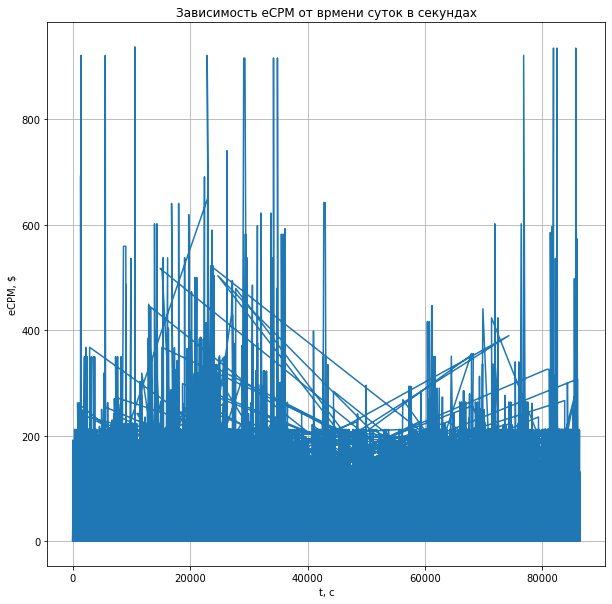

In [65]:
eCPM = 1000 * res_table['revenue']

plt.figure(figsize = (10, 10))
plt.plot(time, eCPM)
plt.title('Зависимость eCPM от врмени суток в секундах')
plt.xlabel('t, c')
plt.ylabel('eCPM, $')
plt.grid(True)

In [66]:
coeff_corr = eCPM.corr(time)
print(coeff_corr)

-0.0013660569334599383


Из полученных реультатов нельзя сделать вывод о наличии выраженной статистической взаимосвязи между врменем суток и eCPM. Коэффициент корреляции близок к нулю.

  # Спасибо за внимание!